# Principal Component Analysis

Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).

## PCA Review

Make sure to watch the video lecture and theory presentation for a full overview of PCA! 
Remember that PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. For example:

<img src='PCA.png' />

## Libraries

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [84]:
from sklearn.datasets import load_breast_cancer

In [85]:
cancer = load_breast_cancer()

In [86]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [87]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [88]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [89]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
# Create instance of scaler. Similar to KNN
scaler = StandardScaler()

# Fit our instance to our dataframe
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
# Now transformed our fitted dataframe using scaler.transform()
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [93]:
from IPython.display import display
indices = [150, 65, 21]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print "Chosen samples of breast cancer dataset:"
display(samples)
display(np.round(df.mean()))
display(np.round(df.median()))

Chosen samples of breast cancer dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,13.000,20.78,83.51,519.4,0.1135,0.07589,0.03136,0.02645,0.2540,0.06087,...,14.16,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435
1,14.780,23.94,97.40,668.3,0.1172,0.14790,0.12670,0.09029,0.1953,0.06654,...,17.31,33.39,114.60,925.1,0.1648,0.3416,0.30240,0.16140,0.3321,0.08911
2,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


mean radius                 14.0
mean texture                19.0
mean perimeter              92.0
mean area                  655.0
mean smoothness              0.0
mean compactness             0.0
mean concavity               0.0
mean concave points          0.0
mean symmetry                0.0
mean fractal dimension       0.0
radius error                 0.0
texture error                1.0
perimeter error              3.0
area error                  40.0
smoothness error             0.0
compactness error            0.0
concavity error              0.0
concave points error         0.0
symmetry error               0.0
fractal dimension error      0.0
worst radius                16.0
worst texture               26.0
worst perimeter            107.0
worst area                 881.0
worst smoothness             0.0
worst compactness            0.0
worst concavity              0.0
worst concave points         0.0
worst symmetry               0.0
worst fractal dimension      0.0
dtype: flo

mean radius                 13.0
mean texture                19.0
mean perimeter              86.0
mean area                  551.0
mean smoothness              0.0
mean compactness             0.0
mean concavity               0.0
mean concave points          0.0
mean symmetry                0.0
mean fractal dimension       0.0
radius error                 0.0
texture error                1.0
perimeter error              2.0
area error                  25.0
smoothness error             0.0
compactness error            0.0
concavity error              0.0
concave points error         0.0
symmetry error               0.0
fractal dimension error      0.0
worst radius                15.0
worst texture               25.0
worst perimeter             98.0
worst area                 686.0
worst smoothness             0.0
worst compactness            0.0
worst concavity              0.0
worst concave points         0.0
worst symmetry               0.0
worst fractal dimension      0.0
dtype: flo

In [94]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(df.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

log_data.head()

/Volumes/RobStorage/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,-1.203640,-1.916643,-1.419231,-2.541985,...,3.233961,2.852439,5.218191,7.610358,-1.818925,-0.407066,-0.339818,-1.326517,-0.776311,-2.129472
1,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,-2.442997,-2.656834,-1.708154,-2.870510,...,3.218476,3.153163,5.067646,7.578657,-2.089088,-1.678788,-1.420472,-1.682009,-1.290984,-2.418894
2,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,-1.622523,-2.056507,-1.575520,-2.813577,...,3.159975,3.239854,5.027165,7.443664,-1.935168,-0.856843,-0.797619,-1.414694,-1.018047,-2.435203
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
4,3.010128,2.663053,4.906015,7.167809,-2.299590,-2.018911,-1.619488,-2.260484,-1.709811,-2.833103,...,3.115292,2.813611,5.025195,7.362011,-1.984859,-1.584745,-0.916291,-1.817077,-1.442230,-2.566811


In [95]:
log_samples.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.564949,3.033991,4.424966,6.252674,-2.175952,-2.578470,-3.462222,-3.632499,-1.370421,-2.799015,...,2.650421,3.182627,4.508880,6.424383,-2.042531,-2.202740,-2.511826,-2.765256,-1.140685,-2.743418
1,2.693275,3.175551,4.578826,6.504737,-2.143873,-1.911219,-2.065933,-2.404729,-1.633218,-2.709952,...,2.851284,3.508256,4.741448,6.829902,-1.803023,-1.074115,-1.196005,-1.823870,-1.102319,-2.417884
2,2.251713,2.520917,4.099995,5.612763,-2.278869,-2.734600,-3.521333,-3.874727,-1.706500,-2.672924,...,2.325325,2.751110,4.176385,5.752255,-2.021928,-2.164564,-2.422834,-2.776276,-1.406497,-2.554514


In [96]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

Data points considered outliers for the feature 'mean radius':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
82,3.227637,3.215269,5.144583,7.537963,-2.241490,-1.322381,-1.096914,-1.690106,-1.698816,-2.690898,...,3.401197,3.515121,5.355170,7.848543,-1.849600,-0.498239,-0.434482,-1.249319,-1.446044,-2.252843
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
180,3.303952,3.085116,5.204556,7.718685,-2.212744,-1.653390,-1.247925,-1.672378,-1.714798,-2.852498,...,3.500137,3.491952,5.397257,8.075894,-1.915963,-0.907827,-0.627359,-1.313788,-1.253163,-2.515531
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
352,3.247658,2.859913,5.160204,7.605890,-2.163693,-1.442653,-1.088266,-1.653912,-1.631684,-2.793445,...,3.500439,3.160399,5.435031,8.081475,-1.877317,-0.521381,-0.438350,-1.288805,-0.996959,-2.428715
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'mean texture':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
166,2.379546,2.273156,4.230768,5.879415,-2.344032,-2.858408,-3.676556,-4.075719,-1.979777,-2.748872,...,2.451005,2.486572,4.299460,6.025866,-1.940724,-2.073857,-2.256656,-3.078462,-1.565421,-2.564080
239,2.859913,3.670715,4.730921,6.825026,-2.321564,-2.041760,-1.954043,-2.429169,-1.709811,-2.819093,...,3.113960,3.803769,4.950177,7.249926,-1.991431,-0.984837,-1.126703,-1.576971,-1.254214,-2.465575


Data points considered outliers for the feature 'mean perimeter':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
82,3.227637,3.215269,5.144583,7.537963,-2.241490,-1.322381,-1.096914,-1.690106,-1.698816,-2.690898,...,3.401197,3.515121,5.355170,7.848543,-1.849600,-0.498239,-0.434482,-1.249319,-1.446044,-2.252843
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
180,3.303952,3.085116,5.204556,7.718685,-2.212744,-1.653390,-1.247925,-1.672378,-1.714798,-2.852498,...,3.500137,3.491952,5.397257,8.075894,-1.915963,-0.907827,-0.627359,-1.313788,-1.253163,-2.515531
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
352,3.247658,2.859913,5.160204,7.605890,-2.163693,-1.442653,-1.088266,-1.653912,-1.631684,-2.793445,...,3.500439,3.160399,5.435031,8.081475,-1.877317,-0.521381,-0.438350,-1.288805,-0.996959,-2.428715
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'mean area':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
180,3.303952,3.085116,5.204556,7.718685,-2.212744,-1.653390,-1.247925,-1.672378,-1.714798,-2.852498,...,3.500137,3.491952,5.397257,8.075894,-1.915963,-0.907827,-0.627359,-1.313788,-1.253163,-2.515531
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
352,3.247658,2.859913,5.160204,7.605890,-2.163693,-1.442653,-1.088266,-1.653912,-1.631684,-2.793445,...,3.500439,3.160399,5.435031,8.081475,-1.877317,-0.521381,-0.438350,-1.288805,-0.996959,-2.428715
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'mean smoothness':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
122,3.188417,3.005683,5.113192,7.473637,-1.933093,-1.249319,-0.851440,-1.603456,-1.326140,-2.676988,...,3.258865,3.177637,5.197944,7.636752,-1.774313,-0.857079,-0.544210,-1.492544,-1.132583,-2.524604
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
504,2.226568,2.554899,4.118875,5.516247,-1.811554,-1.496556,-2.329956,-2.946561,-1.436325,-2.353668,...,2.330200,2.796061,4.234831,5.704449,-1.659679,-1.066823,-1.561124,-2.277892,-1.191386,-2.077843
568,2.048982,3.200304,3.869533,5.198497,-2.944469,-3.132240,-inf,-inf,-1.840740,-2.832933,...,2.246649,3.413455,4.080246,5.593223,-2.408390,-2.742021,-inf,-inf,-1.247925,-2.653704


Data points considered outliers for the feature 'mean compactness':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.47938,6.41149,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926


Data points considered outliers for the feature 'mean concavity':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
58,2.568788,2.960623,4.414131,6.267580,-2.518257,-3.273068,-7.275925,-5.480559,-1.704298,-2.900240,...,2.655352,3.102342,4.502473,6.436311,-2.281803,-2.782074,-6.295276,-4.499910,-1.410997,-2.766368
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
140,2.276036,2.482404,4.114801,5.664695,-2.380547,-3.193696,-inf,-inf,-1.659154,-2.745441,...,2.362739,2.646175,4.197653,5.837439,-2.092324,-2.630534,-inf,-inf,-1.169571,-2.507030
159,2.388763,2.561868,4.229604,5.904817,-2.588269,-3.291984,-5.779584,-5.022505,-1.936554,-2.857188,...,2.514465,2.901422,4.357606,6.152733,-2.144727,-2.489638,-3.987825,-3.230695,-1.295357,-2.565900
174,2.366498,2.718001,4.211979,5.856790,-2.431328,-3.146090,-inf,-inf,-1.646102,-2.817586,...,2.445819,2.954910,4.293195,6.012002,-2.229335,-2.689572,-inf,-inf,-1.305636,-2.786444
175,2.159984,2.670694,3.996732,5.425831,-2.392729,-3.152152,-inf,-inf,-1.759099,-2.699487,...,2.225920,2.835564,4.066631,5.557600,-2.152442,-2.651150,-inf,-inf,-1.350155,-2.544911
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
185,2.310553,2.715357,4.155126,5.760478,-2.378710,-3.058672,-6.439628,-6.030621,-1.770194,-2.805443,...,2.474014,3.053057,4.322675,6.079933,-1.883217,-2.283763,-4.973340,-4.564028,-1.226559,-2.564340
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
276,2.427454,2.650421,4.273745,5.982928,-2.366697,-3.251399,-6.510995,-5.703882,-1.632707,-2.843698,...,2.501436,2.943913,4.348599,6.126869,-2.072267,-2.610742,-5.307358,-4.499910,-1.288079,-2.751062


Data points considered outliers for the feature 'mean concave points':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
140,2.276036,2.482404,4.114801,5.664695,-2.380547,-3.193696,-inf,-inf,-1.659154,-2.745441,...,2.362739,2.646175,4.197653,5.837439,-2.092324,-2.630534,-inf,-inf,-1.169571,-2.507030
174,2.366498,2.718001,4.211979,5.856790,-2.431328,-3.146090,-inf,-inf,-1.646102,-2.817586,...,2.445819,2.954910,4.293195,6.012002,-2.229335,-2.689572,-inf,-inf,-1.305636,-2.786444
175,2.159984,2.670694,3.996732,5.425831,-2.392729,-3.152152,-inf,-inf,-1.759099,-2.699487,...,2.225920,2.835564,4.066631,5.557600,-2.152442,-2.651150,-inf,-inf,-1.350155,-2.544911
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
185,2.310553,2.715357,4.155126,5.760478,-2.378710,-3.058672,-6.439628,-6.030621,-1.770194,-2.805443,...,2.474014,3.053057,4.322675,6.079933,-1.883217,-2.283763,-4.973340,-4.564028,-1.226559,-2.564340
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
314,2.151413,2.923162,3.990649,5.399067,-2.231195,-2.839241,-inf,-inf,-1.531089,-2.609246,...,2.191877,3.110845,4.036892,5.481056,-2.004705,-2.555286,-inf,-inf,-1.157726,-2.511333
391,2.167223,2.823757,4.012230,5.456602,-2.264326,-2.599914,-inf,-inf,-1.616966,-2.645357,...,2.319442,3.126761,4.159039,5.758902,-1.924149,-2.032558,-inf,-inf,-1.408540,-2.423059
473,2.507157,3.400197,4.349245,6.142897,-2.564080,-3.381983,-inf,-inf,-1.771369,-2.820100,...,2.598979,3.638901,4.443592,6.325971,-2.362123,-2.954015,-inf,-inf,-1.423373,-2.696665


Data points considered outliers for the feature 'mean symmetry':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
25,2.841415,2.797281,4.753590,6.816407,-2.131999,-1.480166,-1.501032,-1.965399,-1.190728,-2.601935,...,3.102342,3.063391,5.026509,7.286876,-1.867561,-0.929123,-0.953733,-1.366492,-0.899925,-2.245260
60,2.319442,2.700018,4.167440,5.742683,-2.176834,-2.518133,-4.524512,-4.350528,-1.293533,-2.664991,...,2.399712,2.859340,4.246493,5.909712,-2.059639,-2.316076,-3.831365,-3.657768,-1.033668,-2.523232
78,3.004692,3.176803,4.967728,7.126891,-2.051048,-1.063052,-0.979763,-1.830085,-1.235808,-2.508134,...,3.151453,3.456947,5.137562,7.392032,-1.808499,-0.483859,-0.263835,-1.383099,-0.608806,-2.306192
122,3.188417,3.005683,5.113192,7.473637,-1.933093,-1.249319,-0.851440,-1.603456,-1.326140,-2.676988,...,3.258865,3.177637,5.197944,7.636752,-1.774313,-0.857079,-0.544210,-1.492544,-1.132583,-2.524604
146,2.468100,2.808197,4.369321,6.068426,-2.215490,-1.771957,-1.796370,-2.601665,-1.317515,-2.607617,...,2.620311,3.272606,4.521027,6.383000,-1.976885,-0.893551,-0.797619,-1.679324,-0.549220,-2.273026
183,2.434490,2.702703,4.297693,5.996452,-2.401411,-2.506539,-2.783690,-3.746085,-2.148149,-2.777883,...,2.515274,2.873565,4.370966,6.146757,-2.188364,-1.826351,-1.803023,-2.765256,-1.708706,-2.600048
315,2.524928,2.824351,4.371850,6.177114,-2.463811,-3.261262,-5.409696,-5.047870,-2.107841,-2.869452,...,2.590767,2.981126,4.436515,6.299317,-2.203645,-3.005177,-3.943514,-3.581281,-1.651824,-2.784823
382,2.489065,3.123246,4.366278,6.104347,-2.668589,-2.232127,-2.532879,-3.513918,-2.117767,-2.709201,...,2.531313,3.357245,4.470038,6.191135,-2.430532,-1.135069,-1.233745,-2.214574,-1.518227,-2.369901
561,2.415914,3.379974,4.258021,5.955837,-2.597090,-3.335972,-inf,-inf,-2.244316,-2.900059,...,2.478218,3.645450,4.320018,6.085865,-2.378710,-2.901514,-inf,-inf,-1.854060,-2.829371


Data points considered outliers for the feature 'mean fractal dimension':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
9,2.522524,3.179719,4.430460,6.165208,-2.131999,-1.428784,-1.481485,-2.460058,-1.594549,-2.495806,...,2.714032,3.705737,4.581390,6.567235,-1.685779,0.056380,0.099845,-1.509593,-0.828738,-1.572624
71,2.184702,2.683758,4.073972,5.497168,-2.324524,-1.876664,-2.452711,-3.550162,-1.659679,-2.410170,...,2.275522,2.751748,4.136126,5.650382,-2.114447,-1.412228,-1.942117,-3.039475,-1.489879,-2.221927
78,3.004692,3.176803,4.967728,7.126891,-2.051048,-1.063052,-0.979763,-1.830085,-1.235808,-2.508134,...,3.151453,3.456947,5.137562,7.392032,-1.808499,-0.483859,-0.263835,-1.383099,-0.608806,-2.306192
151,2.106449,3.030134,3.975373,5.317630,-2.363929,-2.036382,-2.024196,-3.831365,-1.504177,-2.493625,...,2.207395,3.391820,4.061821,5.520661,-1.814005,-0.841647,-0.619711,-2.540969,-1.102018,-1.906497
152,2.275317,2.730464,4.155440,5.704449,-2.233059,-1.833207,-0.889649,-2.543765,-1.367276,-2.375586,...,2.399712,2.969902,4.263243,5.941486,-2.046394,-1.283016,-0.196502,-1.850873,-1.168606,-2.072267
176,2.292939,2.893700,4.168214,5.711751,-2.333147,-2.044847,-2.034851,-3.292522,-1.790360,-2.511333,...,2.421257,3.194173,4.291418,5.966659,-2.039452,-1.220780,-1.053830,-2.311626,-1.341703,-2.152442
318,2.201880,2.939162,4.095511,5.499215,-2.305790,-1.623537,-1.622017,-3.014304,-1.456717,-2.436917,...,2.308567,3.152736,4.228584,5.694069,-2.102915,-0.981363,-0.774574,-2.167180,-1.159956,-2.249044
376,2.358020,3.006672,4.250636,5.823933,-2.399867,-1.795767,-1.478410,-2.823293,-1.519597,-2.471004,...,2.384165,3.127637,4.337421,5.863347,-2.168929,-1.016387,-0.505838,-1.920730,-1.348228,-2.120264
504,2.226568,2.554899,4.118875,5.516247,-1.811554,-1.496556,-2.329956,-2.946561,-1.436325,-2.353668,...,2.330200,2.796061,4.234831,5.704449,-1.659679,-1.066823,-1.561124,-2.277892,-1.191386,-2.077843


Data points considered outliers for the feature 'radius error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
122,3.188417,3.005683,5.113192,7.473637,-1.933093,-1.249319,-0.851440,-1.603456,-1.326140,-2.676988,...,3.258865,3.177637,5.197944,7.636752,-1.774313,-0.857079,-0.544210,-1.492544,-1.132583,-2.524604
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'texture error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
12,2.953347,3.210844,4.885828,7.023759,-2.328929,-1.403237,-1.577455,-2.191044,-1.428367,-2.551046,...,3.042616,3.399195,5.021905,7.194437,-2.266253,-0.940840,-1.010876,-1.733302,-1.146963,-2.279846
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
473,2.507157,3.400197,4.349245,6.142897,-2.564080,-3.381983,-inf,-inf,-1.771369,-2.820100,...,2.598979,3.638901,4.443592,6.325971,-2.362123,-2.954015,-inf,-inf,-1.423373,-2.696665
561,2.415914,3.379974,4.258021,5.955837,-2.597090,-3.335972,-inf,-inf,-2.244316,-2.900059,...,2.478218,3.645450,4.320018,6.085865,-2.378710,-2.901514,-inf,-inf,-1.854060,-2.829371


Data points considered outliers for the feature 'perimeter error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
12,2.953347,3.210844,4.885828,7.023759,-2.328929,-1.403237,-1.577455,-2.191044,-1.428367,-2.551046,...,3.042616,3.399195,5.021905,7.194437,-2.266253,-0.940840,-1.010876,-1.733302,-1.146963,-2.279846
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'area error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
122,3.188417,3.005683,5.113192,7.473637,-1.933093,-1.249319,-0.851440,-1.603456,-1.326140,-2.676988,...,3.258865,3.177637,5.197944,7.636752,-1.774313,-0.857079,-0.544210,-1.492544,-1.132583,-2.524604
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
265,3.031582,3.437851,4.910447,7.257708,-2.357147,-2.168929,-1.989967,-2.448073,-1.732171,-2.869276,...,3.480932,3.853546,5.365976,8.140898,-1.965399,-1.330292,-1.066532,-1.796370,-1.248970,-2.498843
368,3.077773,2.847812,4.948050,7.343426,-2.366164,-2.457836,-2.147292,-2.469230,-1.762007,-2.984990,...,3.425890,3.274878,5.295814,8.052933,-1.992897,-1.815233,-1.251414,-1.703749,-1.382302,-2.734292
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'smoothness error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
71,2.184702,2.683758,4.073972,5.497168,-2.324524,-1.876664,-2.452711,-3.550162,-1.659679,-2.410170,...,2.275522,2.751748,4.136126,5.650382,-2.114447,-1.412228,-1.942117,-3.039475,-1.489879,-2.221927
116,2.191654,2.757475,4.073121,5.502074,-2.357886,-2.085057,-2.379142,-3.768789,-2.036382,-2.636241,...,2.242198,2.837323,4.148517,5.598422,-2.137918,-1.671845,-1.868209,-3.258137,-1.800598,-2.561097
122,3.188417,3.005683,5.113192,7.473637,-1.933093,-1.249319,-0.851440,-1.603456,-1.326140,-2.676988,...,3.258865,3.177637,5.197944,7.636752,-1.774313,-0.857079,-0.544210,-1.492544,-1.132583,-2.524604
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
213,2.857619,3.241029,4.740575,6.854355,-2.296603,-2.166307,-1.782602,-2.718555,-2.034086,-2.835997,...,2.894253,3.334701,4.790820,6.928538,-2.085057,-1.718695,-1.271895,-2.208184,-1.830708,-2.685604
314,2.151413,2.923162,3.990649,5.399067,-2.231195,-2.839241,-inf,-inf,-1.531089,-2.609246,...,2.191877,3.110845,4.036892,5.481056,-2.004705,-2.555286,-inf,-inf,-1.157726,-2.511333
345,2.328253,2.688528,4.192680,5.773309,-2.314455,-2.390433,-3.329528,-3.893692,-1.812166,-2.658546,...,2.386926,2.969388,4.261129,5.878016,-1.995100,-1.810331,-2.636381,-3.200545,-1.413049,-2.466517
505,2.269649,2.575661,4.160756,5.607639,-2.075450,-1.512311,-2.130314,-2.653846,-1.581336,-2.346015,...,2.360854,2.892592,4.240895,5.793318,-1.606442,-1.004303,-1.233402,-2.230264,-1.255968,-1.992164


Data points considered outliers for the feature 'compactness error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
190,2.654649,3.140698,4.547223,6.413295,-2.230264,-1.421714,-1.618983,-2.715377,-1.433805,-2.584683,...,2.756205,3.615771,4.667206,6.636471,-1.875358,-0.069672,-0.163932,-1.730476,-0.660486,-1.933784
315,2.524928,2.824351,4.371850,6.177114,-2.463811,-3.261262,-5.409696,-5.047870,-2.107841,-2.869452,...,2.590767,2.981126,4.436515,6.299317,-2.203645,-3.005177,-3.943514,-3.581281,-1.651824,-2.784823


Data points considered outliers for the feature 'concavity error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
58,2.568788,2.960623,4.414131,6.267580,-2.518257,-3.273068,-7.275925,-5.480559,-1.704298,-2.900240,...,2.655352,3.102342,4.502473,6.436311,-2.281803,-2.782074,-6.295276,-4.499910,-1.410997,-2.766368
68,2.200442,2.852439,4.073972,5.523459,-2.238672,-1.956870,-1.161552,-3.129264,-1.555423,-2.519995,...,2.333114,3.120160,4.182050,5.782902,-1.909193,-0.828967,0.224742,-1.742969,-0.860856,-2.141317
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
140,2.276036,2.482404,4.114801,5.664695,-2.380547,-3.193696,-inf,-inf,-1.659154,-2.745441,...,2.362739,2.646175,4.197653,5.837439,-2.092324,-2.630534,-inf,-inf,-1.169571,-2.507030
152,2.275317,2.730464,4.155440,5.704449,-2.233059,-1.833207,-0.889649,-2.543765,-1.367276,-2.375586,...,2.399712,2.969902,4.263243,5.941486,-2.046394,-1.283016,-0.196502,-1.850873,-1.168606,-2.072267
159,2.388763,2.561868,4.229604,5.904817,-2.588269,-3.291984,-5.779584,-5.022505,-1.936554,-2.857188,...,2.514465,2.901422,4.357606,6.152733,-2.144727,-2.489638,-3.987825,-3.230695,-1.295357,-2.565900
174,2.366498,2.718001,4.211979,5.856790,-2.431328,-3.146090,-inf,-inf,-1.646102,-2.817586,...,2.445819,2.954910,4.293195,6.012002,-2.229335,-2.689572,-inf,-inf,-1.305636,-2.786444
175,2.159984,2.670694,3.996732,5.425831,-2.392729,-3.152152,-inf,-inf,-1.759099,-2.699487,...,2.225920,2.835564,4.066631,5.557600,-2.152442,-2.651150,-inf,-inf,-1.350155,-2.544911
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
185,2.310553,2.715357,4.155126,5.760478,-2.378710,-3.058672,-6.439628,-6.030621,-1.770194,-2.805443,...,2.474014,3.053057,4.322675,6.079933,-1.883217,-2.283763,-4.973340,-4.564028,-1.226559,-2.564340


Data points considered outliers for the feature 'concave points error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
12,2.953347,3.210844,4.885828,7.023759,-2.328929,-1.403237,-1.577455,-2.191044,-1.428367,-2.551046,...,3.042616,3.399195,5.021905,7.194437,-2.266253,-0.940840,-1.010876,-1.733302,-1.146963,-2.279846
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
140,2.276036,2.482404,4.114801,5.664695,-2.380547,-3.193696,-inf,-inf,-1.659154,-2.745441,...,2.362739,2.646175,4.197653,5.837439,-2.092324,-2.630534,-inf,-inf,-1.169571,-2.507030
152,2.275317,2.730464,4.155440,5.704449,-2.233059,-1.833207,-0.889649,-2.543765,-1.367276,-2.375586,...,2.399712,2.969902,4.263243,5.941486,-2.046394,-1.283016,-0.196502,-1.850873,-1.168606,-2.072267
174,2.366498,2.718001,4.211979,5.856790,-2.431328,-3.146090,-inf,-inf,-1.646102,-2.817586,...,2.445819,2.954910,4.293195,6.012002,-2.229335,-2.689572,-inf,-inf,-1.305636,-2.786444
175,2.159984,2.670694,3.996732,5.425831,-2.392729,-3.152152,-inf,-inf,-1.759099,-2.699487,...,2.225920,2.835564,4.066631,5.557600,-2.152442,-2.651150,-inf,-inf,-1.350155,-2.544911
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
185,2.310553,2.715357,4.155126,5.760478,-2.378710,-3.058672,-6.439628,-6.030621,-1.770194,-2.805443,...,2.474014,3.053057,4.322675,6.079933,-1.883217,-2.283763,-4.973340,-4.564028,-1.226559,-2.564340
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
306,2.580217,2.761275,4.431650,6.286557,-2.463811,-2.946752,-6.528634,-5.725721,-1.812779,-2.831235,...,2.667922,3.017983,4.521789,6.456613,-2.182139,-2.005448,-4.491842,-3.688879,-1.327648,-2.478726


Data points considered outliers for the feature 'symmetry error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
42,2.948116,3.211247,4.854371,7.006695,-2.398986,-1.518684,-1.557320,-2.306493,-1.465338,-2.757818,...,3.181797,3.501646,5.178407,7.409136,-2.081844,-0.295177,-0.322688,-1.389098,-0.761426,-2.265289
78,3.004692,3.176803,4.967728,7.126891,-2.051048,-1.063052,-0.979763,-1.830085,-1.235808,-2.508134,...,3.151453,3.456947,5.137562,7.392032,-1.808499,-0.483859,-0.263835,-1.383099,-0.608806,-2.306192
119,2.887590,2.996232,4.737951,6.889591,-2.476700,-2.699784,-2.618255,-2.883118,-1.546933,-2.990745,...,3.024320,3.326115,4.861362,7.139660,-2.233059,-2.118598,-1.492099,-2.132842,-0.717030,-2.795080
122,3.188417,3.005683,5.113192,7.473637,-1.933093,-1.249319,-0.851440,-1.603456,-1.326140,-2.676988,...,3.258865,3.177637,5.197944,7.636752,-1.774313,-0.857079,-0.544210,-1.492544,-1.132583,-2.524604
138,2.704711,2.866193,4.573163,6.519295,-2.148149,-2.036382,-1.871452,-2.450621,-1.631172,-2.778044,...,2.920470,3.064792,4.799091,6.878738,-1.958286,-1.530627,-1.092133,-1.791559,-1.074700,-2.638477
146,2.468100,2.808197,4.369321,6.068426,-2.215490,-1.771957,-1.796370,-2.601665,-1.317515,-2.607617,...,2.620311,3.272606,4.521027,6.383000,-1.976885,-0.893551,-0.797619,-1.679324,-0.549220,-2.273026
190,2.654649,3.140698,4.547223,6.413295,-2.230264,-1.421714,-1.618983,-2.715377,-1.433805,-2.584683,...,2.756205,3.615771,4.667206,6.636471,-1.875358,-0.069672,-0.163932,-1.730476,-0.660486,-1.933784
212,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887,...,3.336125,2.916148,5.239098,7.823646,-2.169804,-1.886510,-1.139122,-1.835711,-1.803023,-2.895887
314,2.151413,2.923162,3.990649,5.399067,-2.231195,-2.839241,-inf,-inf,-1.531089,-2.609246,...,2.191877,3.110845,4.036892,5.481056,-2.004705,-2.555286,-inf,-inf,-1.157726,-2.511333


Data points considered outliers for the feature 'fractal dimension error':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
71,2.184702,2.683758,4.073972,5.497168,-2.324524,-1.876664,-2.452711,-3.550162,-1.659679,-2.410170,...,2.275522,2.751748,4.136126,5.650382,-2.114447,-1.412228,-1.942117,-3.039475,-1.489879,-2.221927
152,2.275317,2.730464,4.155440,5.704449,-2.233059,-1.833207,-0.889649,-2.543765,-1.367276,-2.375586,...,2.399712,2.969902,4.263243,5.941486,-2.046394,-1.283016,-0.196502,-1.850873,-1.168606,-2.072267
176,2.292939,2.893700,4.168214,5.711751,-2.333147,-2.044847,-2.034851,-3.292522,-1.790360,-2.511333,...,2.421257,3.194173,4.291418,5.966659,-2.039452,-1.220780,-1.053830,-2.311626,-1.341703,-2.152442
290,2.667922,2.982140,4.564661,6.478510,-2.435317,-1.786175,-1.993631,-2.717798,-1.763755,-2.632201,...,2.758109,3.096934,4.622027,6.642878,-2.304287,-1.397558,-1.505078,-2.281803,-1.481925,-2.430532


Data points considered outliers for the feature 'worst radius':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
180,3.303952,3.085116,5.204556,7.718685,-2.212744,-1.653390,-1.247925,-1.672378,-1.714798,-2.852498,...,3.500137,3.491952,5.397257,8.075894,-1.915963,-0.907827,-0.627359,-1.313788,-1.253163,-2.515531
352,3.247658,2.859913,5.160204,7.605890,-2.163693,-1.442653,-1.088266,-1.653912,-1.631684,-2.793445,...,3.500439,3.160399,5.435031,8.081475,-1.877317,-0.521381,-0.438350,-1.288805,-0.996959,-2.428715
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'worst texture':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
76,2.604909,2.392426,4.476314,6.326507,-2.047168,-2.256656,-2.676988,-2.724790,-1.425867,-2.711908,...,2.644755,2.524928,4.514808,6.406055,-1.930332,-1.981226,-2.460526,-2.602745,-1.305636,-2.63234
166,2.379546,2.273156,4.230768,5.879415,-2.344032,-2.858408,-3.676556,-4.075719,-1.979777,-2.748872,...,2.451005,2.486572,4.299460,6.025866,-1.940724,-2.073857,-2.256656,-3.078462,-1.565421,-2.56408


Data points considered outliers for the feature 'worst perimeter':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
352,3.247658,2.859913,5.160204,7.605890,-2.163693,-1.442653,-1.088266,-1.653912,-1.631684,-2.793445,...,3.500439,3.160399,5.435031,8.081475,-1.877317,-0.521381,-0.438350,-1.288805,-0.996959,-2.428715
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'worst area':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
265,3.031582,3.437851,4.910447,7.257708,-2.357147,-2.168929,-1.989967,-2.448073,-1.732171,-2.869276,...,3.480932,3.853546,5.365976,8.140898,-1.965399,-1.330292,-1.066532,-1.796370,-1.248970,-2.498843
461,3.311273,3.268428,5.230574,7.824446,-2.221927,-1.615456,-1.011976,-1.778448,-1.579394,-2.878305,...,3.584629,3.445852,5.526249,8.355615,-1.997309,-0.854255,-0.380821,-1.337504,-1.331427,-2.600048


Data points considered outliers for the feature 'worst smoothness':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
203,2.625393,3.167583,4.516994,6.393256,-2.022683,-1.732736,-1.859182,-2.388579,-1.491211,-2.600856,...,2.954910,3.734092,4.855929,7.050123,-1.502379,-0.652197,-0.766578,-1.602959,-0.813734,-2.220084
379,2.405142,2.935451,4.294561,5.890539,-2.107018,-1.535259,-1.778448,-2.754042,-1.515948,-2.531998,...,2.583243,3.491038,4.519176,6.230678,-1.521427,-0.064112,-0.174115,-1.376740,-0.878513,-1.963972


Data points considered outliers for the feature 'worst compactness':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.41149,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.71637,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332


Data points considered outliers for the feature 'worst concavity':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
58,2.568788,2.960623,4.414131,6.267580,-2.518257,-3.273068,-7.275925,-5.480559,-1.704298,-2.900240,...,2.655352,3.102342,4.502473,6.436311,-2.281803,-2.782074,-6.295276,-4.499910,-1.410997,-2.766368
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
140,2.276036,2.482404,4.114801,5.664695,-2.380547,-3.193696,-inf,-inf,-1.659154,-2.745441,...,2.362739,2.646175,4.197653,5.837439,-2.092324,-2.630534,-inf,-inf,-1.169571,-2.507030
159,2.388763,2.561868,4.229604,5.904817,-2.588269,-3.291984,-5.779584,-5.022505,-1.936554,-2.857188,...,2.514465,2.901422,4.357606,6.152733,-2.144727,-2.489638,-3.987825,-3.230695,-1.295357,-2.565900
174,2.366498,2.718001,4.211979,5.856790,-2.431328,-3.146090,-inf,-inf,-1.646102,-2.817586,...,2.445819,2.954910,4.293195,6.012002,-2.229335,-2.689572,-inf,-inf,-1.305636,-2.786444
175,2.159984,2.670694,3.996732,5.425831,-2.392729,-3.152152,-inf,-inf,-1.759099,-2.699487,...,2.225920,2.835564,4.066631,5.557600,-2.152442,-2.651150,-inf,-inf,-1.350155,-2.544911
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
185,2.310553,2.715357,4.155126,5.760478,-2.378710,-3.058672,-6.439628,-6.030621,-1.770194,-2.805443,...,2.474014,3.053057,4.322675,6.079933,-1.883217,-2.283763,-4.973340,-4.564028,-1.226559,-2.564340
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
276,2.427454,2.650421,4.273745,5.982928,-2.366697,-3.251399,-6.510995,-5.703882,-1.632707,-2.843698,...,2.501436,2.943913,4.348599,6.126869,-2.072267,-2.610742,-5.307358,-4.499910,-1.288079,-2.751062


Data points considered outliers for the feature 'worst concave points':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
58,2.568788,2.960623,4.414131,6.267580,-2.518257,-3.273068,-7.275925,-5.480559,-1.704298,-2.900240,...,2.655352,3.102342,4.502473,6.436311,-2.281803,-2.782074,-6.295276,-4.499910,-1.410997,-2.766368
101,1.943192,2.597491,3.779405,4.966335,-2.145581,-2.581241,-inf,-inf,-1.645065,-2.548741,...,2.070653,2.972464,3.920190,5.221436,-1.842632,-2.118598,-inf,-inf,-1.226900,-2.366377
140,2.276036,2.482404,4.114801,5.664695,-2.380547,-3.193696,-inf,-inf,-1.659154,-2.745441,...,2.362739,2.646175,4.197653,5.837439,-2.092324,-2.630534,-inf,-inf,-1.169571,-2.507030
174,2.366498,2.718001,4.211979,5.856790,-2.431328,-3.146090,-inf,-inf,-1.646102,-2.817586,...,2.445819,2.954910,4.293195,6.012002,-2.229335,-2.689572,-inf,-inf,-1.305636,-2.786444
175,2.159984,2.670694,3.996732,5.425831,-2.392729,-3.152152,-inf,-inf,-1.759099,-2.699487,...,2.225920,2.835564,4.066631,5.557600,-2.152442,-2.651150,-inf,-inf,-1.350155,-2.544911
178,2.565718,3.100993,4.406841,6.266061,-2.772429,-3.943514,-6.440882,-6.291489,-1.969691,-2.949994,...,2.639057,3.367985,4.479380,6.411490,-2.510224,-3.372027,-4.831193,-4.682159,-1.471852,-2.839926
185,2.310553,2.715357,4.155126,5.760478,-2.378710,-3.058672,-6.439628,-6.030621,-1.770194,-2.805443,...,2.474014,3.053057,4.322675,6.079933,-1.883217,-2.283763,-4.973340,-4.564028,-1.226559,-2.564340
192,2.274186,2.902520,4.106438,5.663308,-2.666429,-3.753311,-inf,-inf,-1.799993,-2.741555,...,2.299380,3.036394,4.131159,5.716370,-2.642684,-3.601235,-inf,-inf,-1.656006,-2.724332
276,2.427454,2.650421,4.273745,5.982928,-2.366697,-3.251399,-6.510995,-5.703882,-1.632707,-2.843698,...,2.501436,2.943913,4.348599,6.126869,-2.072267,-2.610742,-5.307358,-4.499910,-1.288079,-2.751062
285,2.532108,2.912351,4.379899,6.192362,-2.477772,-3.166283,-6.287179,-5.834803,-1.773723,-2.837874,...,2.602690,3.138966,4.449218,6.335232,-2.265289,-2.714471,-5.188746,-4.736190,-1.384296,-2.744040


Data points considered outliers for the feature 'worst symmetry':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,-1.203640,-1.916643,-1.419231,-2.541985,...,3.233961,2.852439,5.218191,7.610358,-1.818925,-0.407066,-0.339818,-1.326517,-0.776311,-2.129472
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
22,2.730464,2.657458,4.629863,6.557346,-2.232127,-1.544118,-1.571661,-2.327288,-1.377929,-2.654699,...,2.894253,2.948641,4.829113,6.888471,-1.973281,-0.518522,-0.461242,-1.430037,-0.762069,-2.308000
31,2.471484,2.928524,4.355811,6.088137,-2.199126,-1.886510,-2.105375,-2.959979,-1.469241,-2.551175,...,2.822569,3.336481,4.782479,6.789760,-1.809720,-0.549047,-0.362980,-1.866914,-0.742127,-1.964685
35,2.817801,3.072230,4.701389,6.767918,-2.342366,-2.012905,-2.003963,-2.810415,-1.662839,-2.872453,...,2.996232,3.367985,4.894101,7.113956,-1.855978,-0.958416,-0.614521,-1.707602,-0.720930,-2.449578
38,2.707383,3.226844,4.559545,6.549365,-2.365844,-2.969870,-3.730535,-3.540804,-1.854699,-2.899695,...,2.707383,3.226844,4.559545,6.549365,-2.365844,-2.969870,-3.730535,-3.540804,-1.854699,-2.899695
42,2.948116,3.211247,4.854371,7.006695,-2.398986,-1.518684,-1.557320,-2.306493,-1.465338,-2.757818,...,3.181797,3.501646,5.178407,7.409136,-2.081844,-0.295177,-0.322688,-1.389098,-0.761426,-2.265289
78,3.004692,3.176803,4.967728,7.126891,-2.051048,-1.063052,-0.979763,-1.830085,-1.235808,-2.508134,...,3.151453,3.456947,5.137562,7.392032,-1.808499,-0.483859,-0.263835,-1.383099,-0.608806,-2.306192
116,2.191654,2.757475,4.073121,5.502074,-2.357886,-2.085057,-2.379142,-3.768789,-2.036382,-2.636241,...,2.242198,2.837323,4.148517,5.598422,-2.137918,-1.671845,-1.868209,-3.258137,-1.800598,-2.561097
119,2.887590,2.996232,4.737951,6.889591,-2.476700,-2.699784,-2.618255,-2.883118,-1.546933,-2.990745,...,3.024320,3.326115,4.861362,7.139660,-2.233059,-2.118598,-1.492099,-2.132842,-0.717030,-2.795080


Data points considered outliers for the feature 'worst fractal dimension':


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,-0.375567,-1.356736,-0.409774,-1.754464
9,2.522524,3.179719,4.430460,6.165208,-2.131999,-1.428784,-1.481485,-2.460058,-1.594549,-2.495806,...,2.714032,3.705737,4.581390,6.567235,-1.685779,0.056380,0.099845,-1.509593,-0.828738,-1.572624
14,2.619583,3.118392,4.539030,6.360093,-2.179483,-1.472724,-1.547403,-2.522609,-1.575520,-2.566290,...,2.710048,3.466048,4.689511,6.547789,-1.801204,-0.258123,-0.364851,-1.510498,-1.022763,-1.944212
31,2.471484,2.928524,4.355811,6.088137,-2.199126,-1.886510,-2.105375,-2.959979,-1.469241,-2.551175,...,2.822569,3.336481,4.782479,6.789760,-1.809720,-0.549047,-0.362980,-1.866914,-0.742127,-1.964685
105,2.573375,2.744704,4.468319,6.273254,-1.967542,-1.734434,-1.574554,-2.343303,-1.647659,-2.564989,...,2.791778,3.109061,4.667206,6.718047,-1.680934,-0.891842,-0.450044,-1.616463,-1.156135,-1.962548
151,2.106449,3.030134,3.975373,5.317630,-2.363929,-2.036382,-2.024196,-3.831365,-1.504177,-2.493625,...,2.207395,3.391820,4.061821,5.520661,-1.814005,-0.841647,-0.619711,-2.540969,-1.102018,-1.906497
190,2.654649,3.140698,4.547223,6.413295,-2.230264,-1.421714,-1.618983,-2.715377,-1.433805,-2.584683,...,2.756205,3.615771,4.667206,6.636471,-1.875358,-0.069672,-0.163932,-1.730476,-0.660486,-1.933784
379,2.405142,2.935451,4.294561,5.890539,-2.107018,-1.535259,-1.778448,-2.754042,-1.515948,-2.531998,...,2.583243,3.491038,4.519176,6.230678,-1.521427,-0.064112,-0.174115,-1.376740,-0.878513,-1.963972
505,2.269649,2.575661,4.160756,5.607639,-2.075450,-1.512311,-2.130314,-2.653846,-1.581336,-2.346015,...,2.360854,2.892592,4.240895,5.793318,-1.606442,-1.004303,-1.233402,-2.230264,-1.255968,-1.992164
562,2.722610,3.421653,4.638605,6.574936,-2.255702,-1.566857,-1.366492,-2.361380,-1.547403,-2.637778,...,2.863343,3.756304,4.857484,6.818924,-1.954043,-0.233573,0.157004,-1.445620,-0.894285,-1.959705


In [97]:
outliers  = [101, 122, 178, 212, 461, 561]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

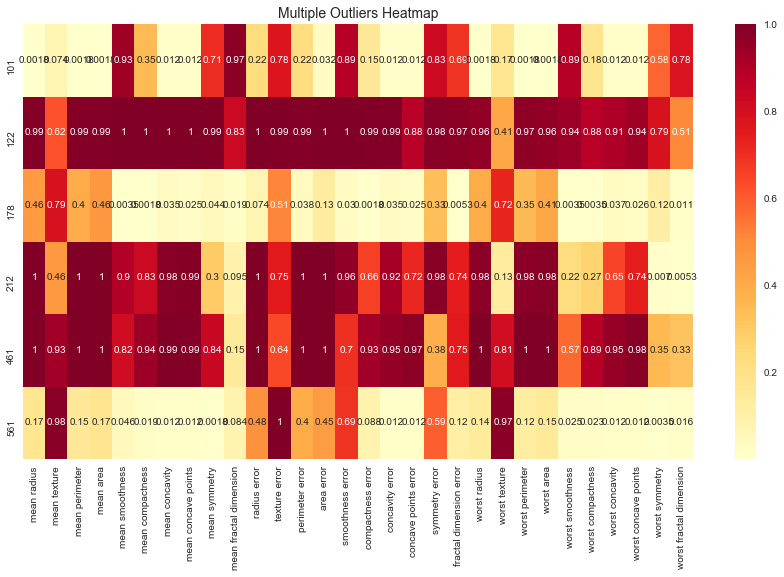

In [98]:
# Heatmap using percentiles to display outlier data
percentiles = log_data.rank(pct=True)
percentiles = percentiles.iloc[outliers]
plt.rcParams['figure.figsize']=(15, 8)
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, cmap="YlOrRd", annot=True)
display(heat)

## PCA

In [99]:
from sklearn.decomposition import PCA

In [100]:
# Create a PCA instance setting n_components
pca = PCA(n_components=10)

In [101]:
# fit our data using our PCA instance
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [102]:
# transform our data
x_pca = pca.transform(scaled_data)

In [103]:
scaled_data.shape

(569, 30)

In [104]:
x_pca.shape

(569, 10)

Dimension 1     0.4427
Dimension 2     0.6324
Dimension 3     0.7263
Dimension 4     0.7923
Dimension 5     0.8473
Dimension 6     0.8875
Dimension 7     0.9100
Dimension 8     0.9259
Dimension 9     0.9398
Dimension 10    0.9515
Name: Explained Variance, dtype: float64


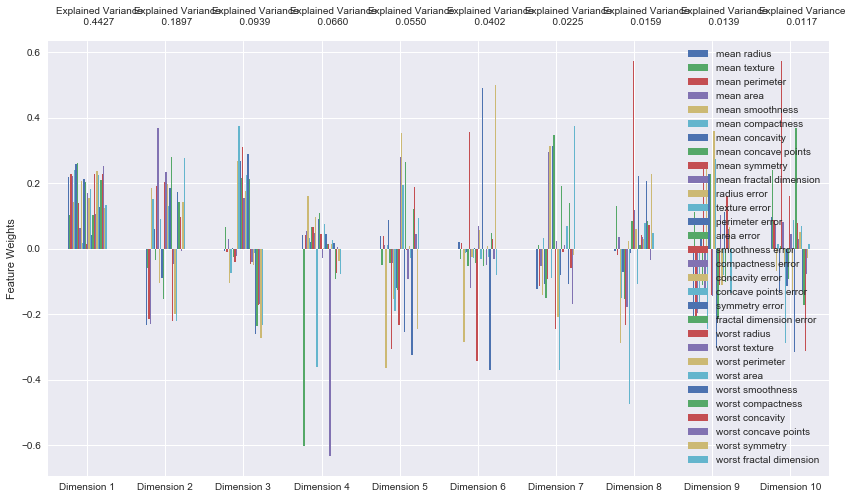

In [105]:
import renders as rs
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print pca_results['Explained Variance'].cumsum()

In [106]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(scaled_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(scaled_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

Looks like our best result is obtained with just two clusters. Let's revise that!

In [107]:
# Create a PCA instance setting n_components
pca = PCA(n_components=2)

# fit our data using our PCA instance
pca.fit(scaled_data)

# transform our data
x_pca = pca.transform(scaled_data)

scaled_data.shape, x_pca.shape

((569, 30), (569, 2))

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

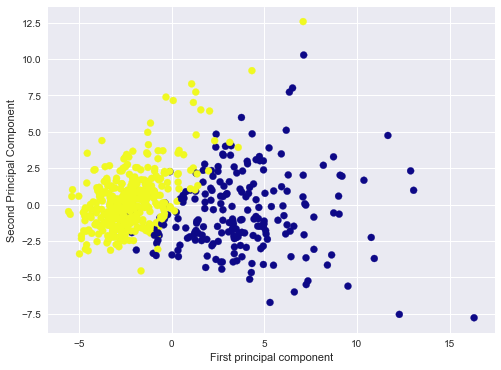

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [109]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [110]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

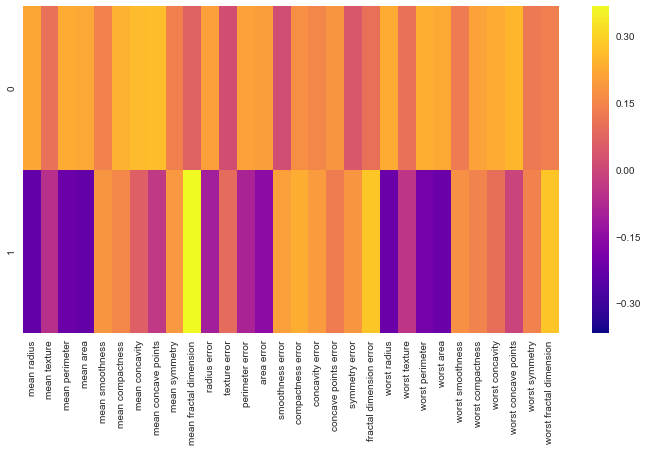

In [111]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

# Great Job!